# Atividade 2 - Comparações dos Resultados dos Alunos


## Configurações Iniciais

In [1]:
from IPython.display import clear_output
import sys

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    # for saving videos
    !apt-get install ffmpeg freeglut3-dev xvfb

    !pip install gym==0.23.1
    !pip install optuna

    # clone repository
    !git clone https://github.com/pablo-sampaio/rl_facil
    sys.path.append("/content/rl_facil")

    clear_output()
else:
    from os import path
    sys.path.append( path.dirname( path.dirname( path.abspath("__main__") ) ) )

clear_output()

In [2]:
import gym
import numpy as np
import optuna

from util.experiments import test_greedy_Q_policy, repeated_exec
from util.plot import plot_result, plot_multiple_results
from util.wrappers import DiscreteObservationWrapper

from cap05.nstep_sarsa import run_nstep_sarsa

d:\Pablo\anaconda3\envs\rlx\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Caio

In [3]:
'''env = gym.make("CartPole-v1")
episodes = 10000

def treinar_com_n_step_sarsa(trial : optuna.Trial):
    global env, episodes
    
    nstep = trial.suggest_categorical("nstep", [2 ** n for n in range(6)])
    lr = trial.suggest_uniform("learning_rate", 0.001, 1.0)
    gamma = trial.suggest_uniform("gamma", 0.90, 0.99)
    epsilon = trial.suggest_uniform("epsilon", 0.01, 0.2)
    bins1 = trial.suggest_categorical('bins1', [6, 12, 24, 48]) #cart position
    bins2 = trial.suggest_categorical('bins2', [6, 12, 24, 48]) #car velocity
    bins3 = trial.suggest_int('bins3', [10, 20]) #pole angle
    bins4 = trial.suggest_int('bins4', [10, 20]) #pole angular velocity
    
    env_wrapper = DiscreteObservationWrapper(env, [bins1, bins2, bins3, bins4])
    
    sum_rewards_per_ep, Q = run_nstep_sarsa(env_wrapper, episodes, nstep, lr, gamma, epsilon)
    
    return sum(sum_rewards_per_ep[-100:])/100

def otimizar(trials):
    study = optuna.create_study(direction = "maximize", study_name = "sarsa_results")
    study.optimize(treinar_com_n_step_sarsa, n_trials = trials)
    return study.best_params

def main():
    melhores = otimizar(20)
    print("Melhores parâmetros:")
    print(melhores)
main()'''

'env = gym.make("CartPole-v1")\nepisodes = 10000\n\ndef treinar_com_n_step_sarsa(trial : optuna.Trial):\n    global env, episodes\n    \n    nstep = trial.suggest_categorical("nstep", [2 ** n for n in range(6)])\n    lr = trial.suggest_uniform("learning_rate", 0.001, 1.0)\n    gamma = trial.suggest_uniform("gamma", 0.90, 0.99)\n    epsilon = trial.suggest_uniform("epsilon", 0.01, 0.2)\n    bins1 = trial.suggest_categorical(\'bins1\', [6, 12, 24, 48]) #cart position\n    bins2 = trial.suggest_categorical(\'bins2\', [6, 12, 24, 48]) #car velocity\n    bins3 = trial.suggest_int(\'bins3\', [10, 20]) #pole angle\n    bins4 = trial.suggest_int(\'bins4\', [10, 20]) #pole angular velocity\n    \n    env_wrapper = DiscreteObservationWrapper(env, [bins1, bins2, bins3, bins4])\n    \n    sum_rewards_per_ep, Q = run_nstep_sarsa(env_wrapper, episodes, nstep, lr, gamma, epsilon)\n    \n    return sum(sum_rewards_per_ep[-100:])/100\n\ndef otimizar(trials):\n    study = optuna.create_study(direction =

## Geraldo Fernando


In [5]:
ENV = gym.make("CartPole-v1")

def train_continuous_nstep(trial : optuna.Trial):

    # chama os métodos do "trial" (tentativa) para sugerir valores para os parâmetros
    lr = trial.suggest_uniform('learning_rate', 0.001, 1.0)
    eps = trial.suggest_uniform('epsilon', 0.01, 0.2)
    gamma = trial.suggest_uniform('gamma', 0.9, 0.99)
    nsteps = trial.suggest_int('n_steps', 2, 10)
    bins1 = trial.suggest_int('bins1', 5, 100)
    bins2 = trial.suggest_int('bins2', 5, 100)
    bins3 = trial.suggest_int('bins3', 5, 100)
    bins4 = trial.suggest_int('bins4', 5, 100)

    all_bins = [bins1, bins2, bins3, bins4]

    print(f"\nTRIAL #{trial.number}: nsteps={nsteps}, lr={lr}, gamma={gamma}, eps={eps}, bins={all_bins}")

    # cria o wrapper e roda o algoritmo, recebendo os retornos não-descontados
    env_wrapper = DiscreteObservationWrapper(ENV, all_bins)
    (returns, _) = run_nstep_sarsa(env_wrapper, 10000, nstep=nsteps, lr=lr, gamma=gamma, epsilon=eps)

    # limpa a saída da célula do notebook
    clear_output()

    # média dos retornos dos últimos 1000 episódios
    return sum(returns[-1000:])/1000


In [6]:
'''study = optuna.create_study(direction='maximize',
                        storage='sqlite:///aluno_geraldo.db',
                        study_name='nstepsarsa_continuo1',
                        load_if_exists=True)

study.optimize(train_continuous_nstep, n_trials=30)

print("MELHORES PARÂMETROS:")
print(study.best_params)
'''

# Rodando 30 Trials com 10.000 passos, os resultados foram:

#[I 2023-07-11 02:19:42,250] Trial 29 finished with value: 130.783 and parameters: {'bins1': 49, 'bins2': 62, 'bins3': 44, 'bins4': 16, 'epsilon': 0.06449205083667978, 'gamma': 0.9524492957354194, 'learning_rate': 0.07962051645520551, 'n_steps': 6}. Best is trial 24 with value: 168.127.
#MELHORES PARÂMETROS:
#{'bins1': 46, 'bins2': 66, 'bins3': 76, 'bins4': 12, 'epsilon': 0.056690969777724594, 'gamma': 0.9634029068624478, 'learning_rate': 0.4585919223882591, 'n_steps': 8}

'study = optuna.create_study(direction=\'maximize\',\n                        storage=\'sqlite:///aluno_geraldo.db\',\n                        study_name=\'nstepsarsa_continuo1\',\n                        load_if_exists=True)\n\nstudy.optimize(train_continuous_nstep, n_trials=30)\n\nprint("MELHORES PARÂMETROS:")\nprint(study.best_params)\n'

In [7]:
bins_geraldo = [46, 66, 76, 12]
params_geraldo = {'epsilon': 0.056690969777724594, 'gamma': 0.9634029068624478, 'lr': 0.4585919223882591, 'nsteps': 8}

## Henrique

In [8]:
# cria apenas a versão contínua
ENV = gym.make("CartPole-v1")

def train_continuous(trial : optuna.Trial):

    # chama os métodos do "trial" (tentativa) para sugerir valores para os parâmetros
    lr = trial.suggest_uniform('learning_rate', 0.001, 1.0)
    eps = trial.suggest_uniform('epsilon', 0.01, 0.2)
    n_steps = trial.suggest_int('n_steps', 1, 10)
    bins1 = trial.suggest_int('bins1', 5, 100)
    bins2 = trial.suggest_int('bins2', 5, 100)
    bins3 = trial.suggest_int('bins3', 5, 100)
    bins4 = trial.suggest_int('bins4', 5, 100)

    all_bins = [bins1, bins2, bins3, bins4]

    print(f"\nTRIAL #{trial.number}: lr={lr}, eps={eps}, n_steps={n_steps}, bins={all_bins}")

    # cria o wrapper e roda o algoritmo, recebendo os retornos não-descontados
    env_wrapper = DiscreteObservationWrapper(ENV, all_bins)
    (returns, _) = run_nstep_sarsa(env_wrapper, 10000, nstep=n_steps, lr=lr, epsilon=eps)

    # limpa a saída da célula do notebook
    clear_output()

    # média dos retornos dos últimos 1000 episódios
    return sum(returns[-1000:])/1000

In [9]:
'''study = optuna.create_study(direction='maximize',
                        storage='sqlite:///aluno_henrique.db',
                        study_name='n_step_sarsa_continuo_1000(2)',
                        load_if_exists=True)

# maximiza o valor de retorno de train_exp_sarsa_continuous, rodando "n_trials" vezes
study.optimize(train_continuous, n_trials=100)

print("MELHORES PARÂMETROS:")
print(study.best_params)'''

'study = optuna.create_study(direction=\'maximize\',\n                        storage=\'sqlite:///aluno_henrique.db\',\n                        study_name=\'n_step_sarsa_continuo_1000(2)\',\n                        load_if_exists=True)\n\n# maximiza o valor de retorno de train_exp_sarsa_continuous, rodando "n_trials" vezes\nstudy.optimize(train_continuous, n_trials=100)\n\nprint("MELHORES PARÂMETROS:")\nprint(study.best_params)'

In [10]:
#MELHORES PARÂMETROS: {'bins1': 54, 'bins2': 95, 'bins3': 22, 'bins4': 60, 'epsilon': 0.19290853234745597, 'learning_rate': 0.04675538887799083, 'n_steps': 6}
bins_henrique = [54, 95, 22, 60]
params_henrique = {'epsilon': 0.19290853234745597, 'lr': 0.04675538887799083, 'nsteps': 6}

## Juan

In [11]:
# cria apenas a versão contínua
ENV = gym.make("CartPole-v1")

def train_continuous(trial : optuna.Trial):

    # chama os métodos do "trial" (tentativa) para sugerir valores para os parâmetros
    lr = trial.suggest_uniform('learning_rate', 0.001, 1.0)
    eps = trial.suggest_uniform('epsilon', 0.01, 0.4)
    gamma = trial.suggest_uniform('gamma', 0.90, 1)
    nstep = trial.suggest_int('nstep',1,10)
    bins1 = trial.suggest_int('bins1', 5, 100)
    bins2 = trial.suggest_int('bins2', 5, 100)
    bins3 = trial.suggest_int('bins3', 5, 100)
    bins4 = trial.suggest_int('bins4', 5, 100)

    all_bins = [bins1, bins2, bins3, bins4]

    print(f"\nTRIAL #{trial.number}: lr={lr}, gamma{gamma}, eps={eps}, bins={all_bins}")

    # cria o wrapper e roda o algoritmo, recebendo os retornos não-descontados
    env_wrapper = DiscreteObservationWrapper(ENV, all_bins)
    (returns, _) = run_nstep_sarsa(env_wrapper, 10000, nstep=nstep, lr=lr, gamma=gamma, epsilon=eps, render=False)

    # limpa a saída da célula do notebook
    clear_output()

    # média dos retornos dos últimos 1000 episódios
    return sum(returns[-1000:])/1000


In [12]:
'''study = optuna.create_study(direction='maximize',
                        storage='sqlite:///aluno_juan.db',
                        study_name='expsarsa_continuo',
                        load_if_exists=True)

# maximiza o valor de retorno de train_exp_sarsa_continuous, rodando "n_trials" vezes
study.optimize(train_continuous, n_trials=60)

print("MELHORES PARÂMETROS:")
print(study.best_params)'''

'study = optuna.create_study(direction=\'maximize\',\n                        storage=\'sqlite:///aluno_juan.db\',\n                        study_name=\'expsarsa_continuo\',\n                        load_if_exists=True)\n\n# maximiza o valor de retorno de train_exp_sarsa_continuous, rodando "n_trials" vezes\nstudy.optimize(train_continuous, n_trials=60)\n\nprint("MELHORES PARÂMETROS:")\nprint(study.best_params)'

In [13]:
# {'learning_rate': 0.019488558653815453, 'epsilon': 0.13667146823591167, 'gamma': 0.9908014646122313, 'nstep': 5, 'bins1': 26, 'bins2': 44, 'bins3': 43, 'bins4': 68}
bins_juan = [26, 44, 43, 68]
params_juan = {'lr': 0.019488558653815453, 'epsilon': 0.13667146823591167, 'gamma': 0.9908014646122313, 'nsteps': 5}

## Lucas Burle

In [14]:
EPISODES = 5000

env = gym.make("CartPole-v1")

def train_optune(trial: optuna.trial):

  lr = trial.suggest_uniform('learning_rate', 0.001, 1.0)
  gamma = trial.suggest_uniform('gamma', 0.75, 1.0)
  eps = trial.suggest_uniform('epsilon', 0.01, 0.2)
  nsteps = trial.suggest_int('nsteps', 2, 25)

  bins1 = trial.suggest_int('bins1', 5, 100)
  bins2 = trial.suggest_int('bins2', 5, 100)
  bins3 = trial.suggest_int('bins3', 5, 100)
  bins4 = trial.suggest_int('bins4', 5, 100)

  all_bins = [bins1, bins2, bins3, bins4]

  env_wrapper = DiscreteObservationWrapper(env, all_bins)

  rewards, _ = run_nstep_sarsa(env_wrapper, EPISODES, nsteps, lr, gamma, eps, render=False)

  clear_output()

  return sum(rewards[-1000:])/1000

In [15]:
'''study = optuna.create_study(direction='maximize',
                        storage='sqlite:///aluno_lucas.db',
                        study_name='nstep_sarsa',
                        load_if_exists=True)

study.optimize(train_optune, n_trials=100)

print("MELHORES PARÂMETROS:")
print(study.best_params)'''

'study = optuna.create_study(direction=\'maximize\',\n                        storage=\'sqlite:///aluno_lucas.db\',\n                        study_name=\'nstep_sarsa\',\n                        load_if_exists=True)\n\nstudy.optimize(train_optune, n_trials=100)\n\nprint("MELHORES PARÂMETROS:")\nprint(study.best_params)'

In [16]:
# {'learning_rate': 0.08153004802444486, 'gamma': 0.8541743150962321, 'epsilon': 0.10143682625389586, 'nsteps': 9, 'bins1': 6, 'bins2': 63, 'bins3': 96, 'bins4': 68}
bins_lucas = [6, 63, 96, 68]
params_lucas = {'lr': 0.08153004802444486, 'gamma': 0.8541743150962321, 'epsilon': 0.10143682625389586, 'nsteps': 9 }

## Mario

In [17]:

#params_mario = {'learning_rate': 0.155, 'epsilon': 0.021, 'gamma': ??, 'nstep': ??, 'bins1': 61, 'bins2': 61, 'bins3': 57, 'bins4': 8}


## Victor

In [18]:
ENV = gym.make("CartPole-v1")

def train(trial: optuna.Trial):

    EPISODES = 20000

    # Parâmetros para otimizar
    n_step = int(trial.suggest_discrete_uniform('n_step', 20, 100, 1))
    lr = trial.suggest_uniform('learning_rate', 0.0001, 0.01)
    gamma = trial.suggest_uniform('gamma', 0.75, 0.95)
    epsilon = trial.suggest_uniform('epsilon', 0.001, 0.2)
    print("n_step ->", n_step, type(n_step))

    # Cart Position (min = -4.8 , max = +4.8)
    cart_position_bin_options = [16, 20, 24]

    # Cart Velocity (-inf, +inf)
    cart_velocity_bin_options = [45, 50, 55, 60]

    # 48 possible integer pole angles
    pole_angle_dividers = [2, 3, 6, 8, 12, 16, 24]
    pole_angle_bin_options = pole_angle_dividers[3:] # filter out small dividers

    # Pole Angular Velocity (-inf, +inf)
    pole_angular_velocity_options = [18, 20, 22, 25, 27]

    cart_position_bin = trial.suggest_categorical('cart_position_bin', cart_position_bin_options)
    cart_velocity_bin = trial.suggest_categorical('cart_velocity_bin', cart_velocity_bin_options)
    pole_angle_bin = trial.suggest_categorical('pole_angle_bin', pole_angle_bin_options)
    pole_angular_velocity_bin = trial.suggest_categorical('pole_angular_velocity_bin', pole_angular_velocity_options)

    all_bins = [cart_position_bin, cart_velocity_bin, pole_angle_bin, pole_angular_velocity_bin]
    DISCRETE_ENV = DiscreteObservationWrapper(ENV, all_bins)

    sum_rewards_per_ep, Q = run_nstep_sarsa(DISCRETE_ENV, EPISODES, n_step, lr, gamma, epsilon)

    # print("Últimos resultados: media =", np.mean(sum_rewards_per_ep[-20:]), ", desvio padrao =", np.std(sum_rewards_per_ep[-20:]))

    return np.mean(sum_rewards_per_ep[-20:])

In [19]:
'''study = optuna.create_study(direction='maximize',
                            storage='sqlite:///resultado_optuna.db',
                            study_name='n-step SARSA in CartPole-v1 environment',
                            load_if_exists=True)

study.optimize(train, n_trials=11)

print("=------------------=")
print("MELHORES PARÂMETROS:")
print(study.best_params)
print("=------------------=")

ENV.close()'''

'study = optuna.create_study(direction=\'maximize\',\n                            storage=\'sqlite:///resultado_optuna.db\',\n                            study_name=\'n-step SARSA in CartPole-v1 environment\',\n                            load_if_exists=True)\n\nstudy.optimize(train, n_trials=11)\n\nprint("=------------------=")\nprint("MELHORES PARÂMETROS:")\nprint(study.best_params)\nprint("=------------------=")\n\nENV.close()'

In [20]:
bins_victor = [16, 60, 16, 20]
params_victor = {'epsilon': 0.17381278878335774, 'gamma': 0.9043214361106835, 'lr':0.00712427250809723, 'nsteps': 37}

## COMPARAÇÃO FINAL

Comparação entre os parâmetros obtidos pelos alunos.

In [21]:
ENV = gym.make("CartPole-v1")
REPETITIONS = 4
NUM_EPISODES = 30000
AUTO_LOAD = True

results = []

In [22]:
# Caio...
'''
wrapped_env = DiscreteObservationWrapper(ENV, bins_caio)
results.append( repeated_exec(REPETITIONS, f"Caio", run_nstep_sarsa, wrapped_env, NUM_EPISODES, **params_caio, render=False, auto_load=AUTO_LOAD) )
clear_output()
'''

'\nwrapped_env = DiscreteObservationWrapper(ENV, bins_caio)\nresults.append( repeated_exec(REPETITIONS, f"Caio", run_nstep_sarsa, wrapped_env, NUM_EPISODES, **params_caio, render=False, auto_load=AUTO_LOAD) )\nclear_output()\n'

In [23]:
wrapped_env = DiscreteObservationWrapper(ENV, bins_geraldo)
results.append( repeated_exec(REPETITIONS, f"Geraldo", run_nstep_sarsa, wrapped_env, NUM_EPISODES, **params_geraldo, render=False, auto_load=AUTO_LOAD) )
clear_output()

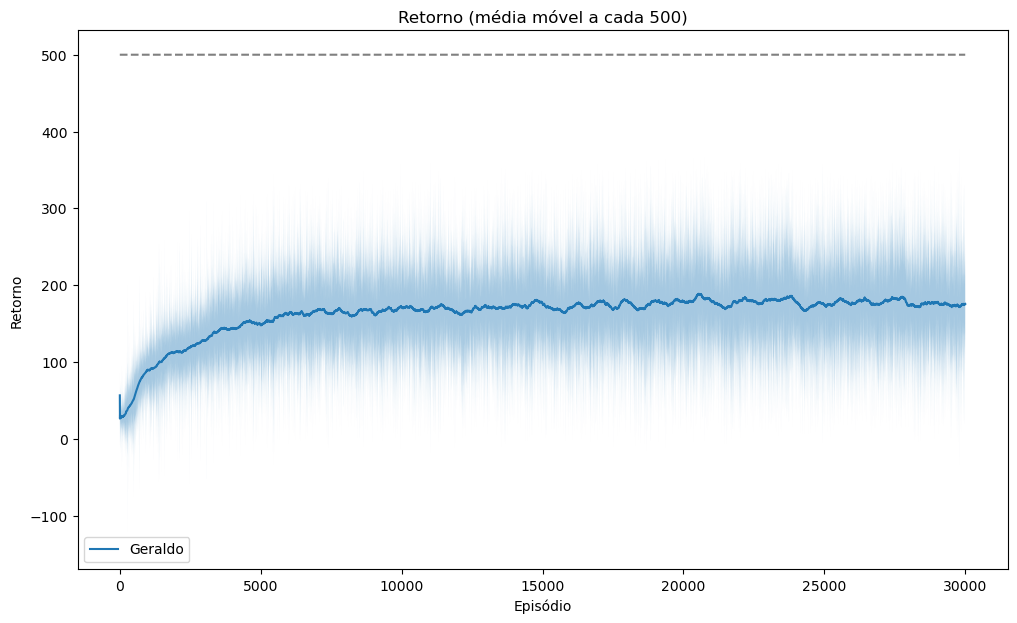

In [36]:
plot_multiple_results(results[0:1], cumulative='no', plot_stddev=True, window=500, yreference=500)

In [25]:
wrapped_env = DiscreteObservationWrapper(ENV, bins_henrique)
results.append( repeated_exec(REPETITIONS, f"Henrique", run_nstep_sarsa, wrapped_env, NUM_EPISODES, **params_henrique, render=False, auto_load=AUTO_LOAD) )
clear_output()

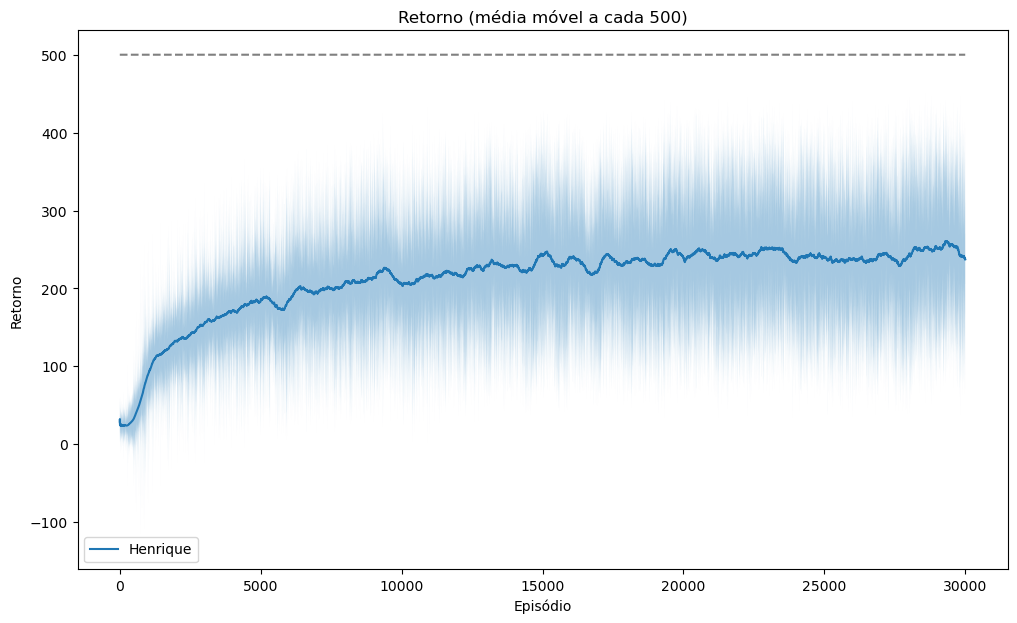

In [26]:
plot_multiple_results(results[1:2], cumulative='no', plot_stddev=True, window=500, yreference=500)

In [27]:
wrapped_env = DiscreteObservationWrapper(ENV, bins_juan)
results.append( repeated_exec(REPETITIONS, f"Juan", run_nstep_sarsa, wrapped_env, NUM_EPISODES, **params_juan, render=False, auto_load=AUTO_LOAD) )
clear_output()

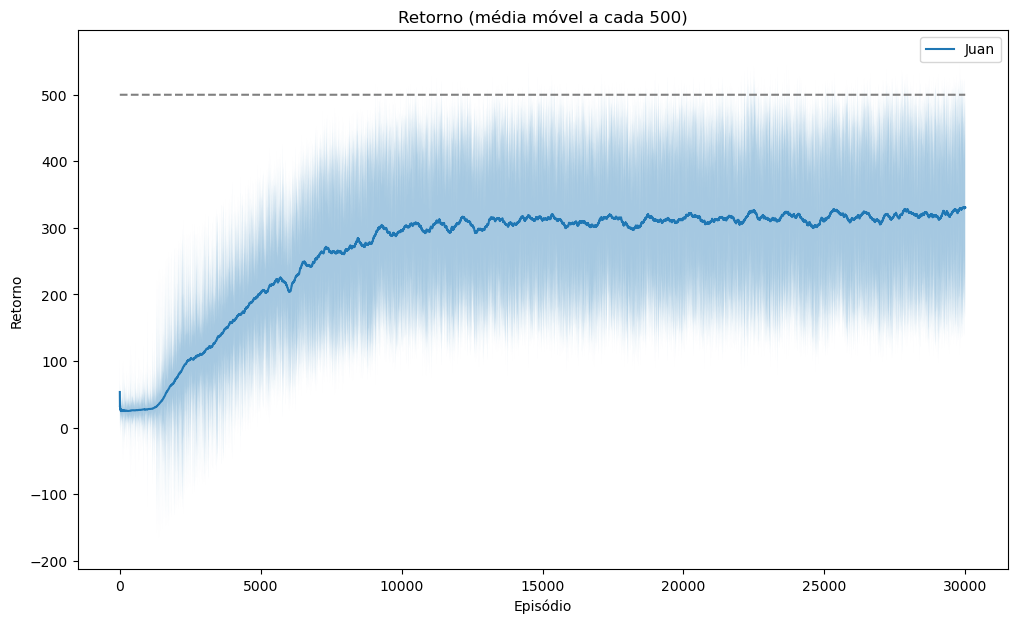

In [28]:
plot_multiple_results(results[2:3], cumulative='no', plot_stddev=True, window=500, yreference=500)

In [29]:
wrapped_env = DiscreteObservationWrapper(ENV, bins_lucas)
results.append( repeated_exec(REPETITIONS, f"Lucas", run_nstep_sarsa, wrapped_env, NUM_EPISODES, **params_lucas, render=False, auto_load=AUTO_LOAD) )
clear_output()

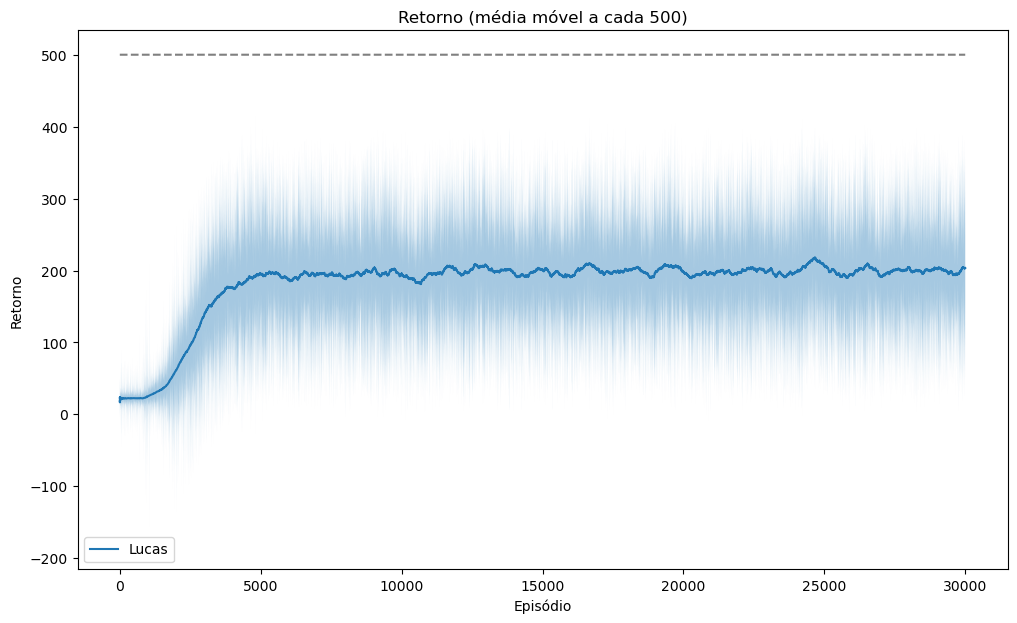

In [30]:
plot_multiple_results(results[3:4], cumulative='no', plot_stddev=True, window=500, yreference=500)

In [31]:
# Mario...
'''
wrapped_env = DiscreteObservationWrapper(ENV, bins_mario)
results.append( repeated_exec(REPETITIONS, f"Mario", run_nstep_sarsa, wrapped_env, NUM_EPISODES, **params_mario, render=False, auto_load=AUTO_LOAD) )
clear_output()
'''

'\nwrapped_env = DiscreteObservationWrapper(ENV, bins_mario)\nresults.append( repeated_exec(REPETITIONS, f"Mario", run_nstep_sarsa, wrapped_env, NUM_EPISODES, **params_mario, render=False, auto_load=AUTO_LOAD) )\nclear_output()\n'

In [32]:
wrapped_env = DiscreteObservationWrapper(ENV, bins_victor)
results.append( repeated_exec(REPETITIONS, f"Victor", run_nstep_sarsa, wrapped_env, NUM_EPISODES, **params_victor, render=False, auto_load=AUTO_LOAD) )
clear_output()

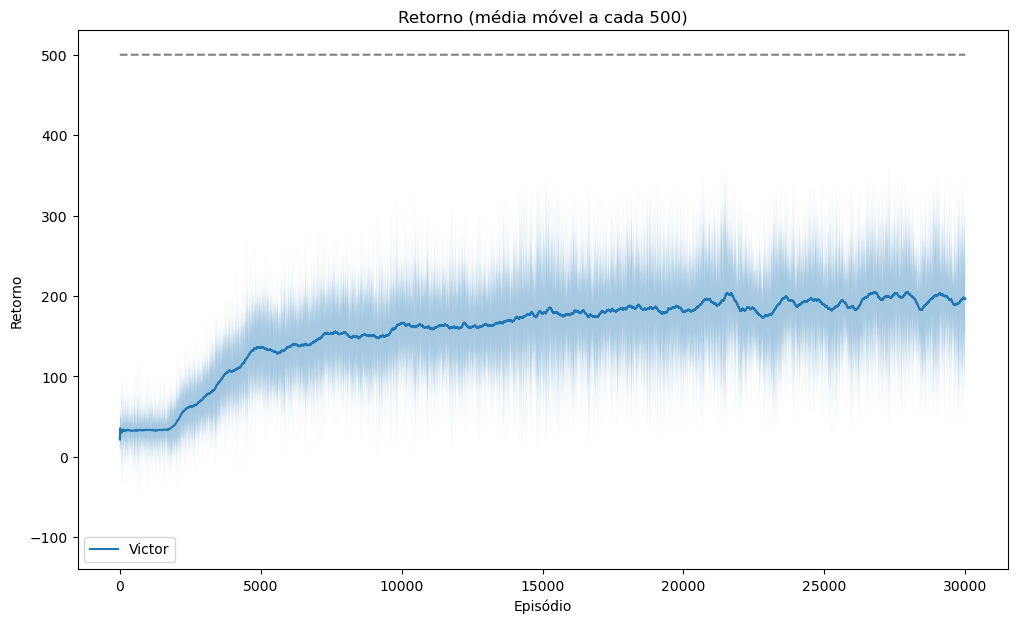

In [33]:
plot_multiple_results(results[4:5], cumulative='no', plot_stddev=True, window=500, yreference=500)

### Gráfico com Todos os Resultados

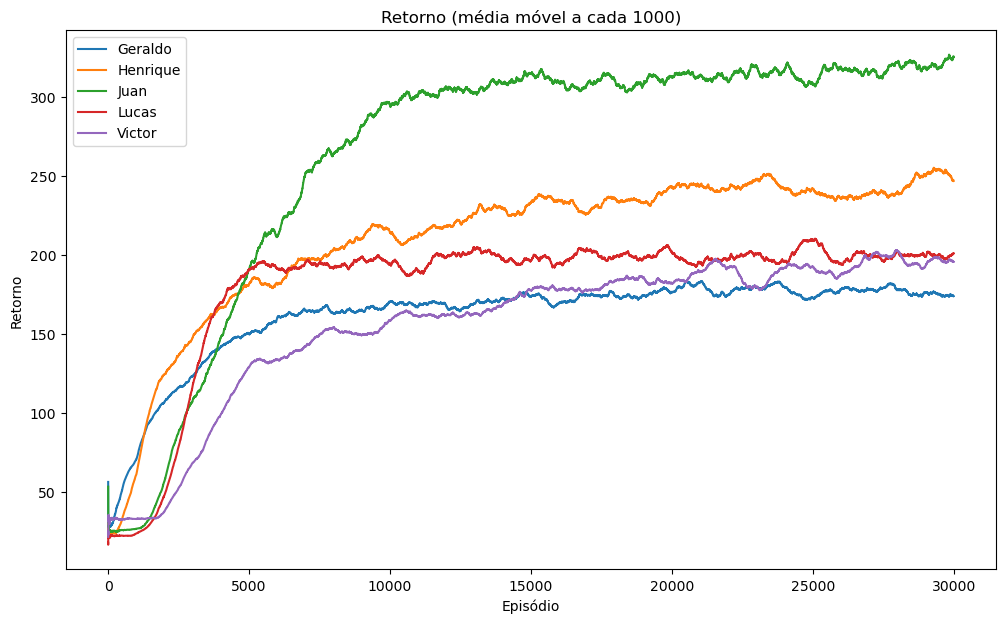

In [41]:
plot_multiple_results(results, cumulative='no', x_log_scale=False, window=1000)

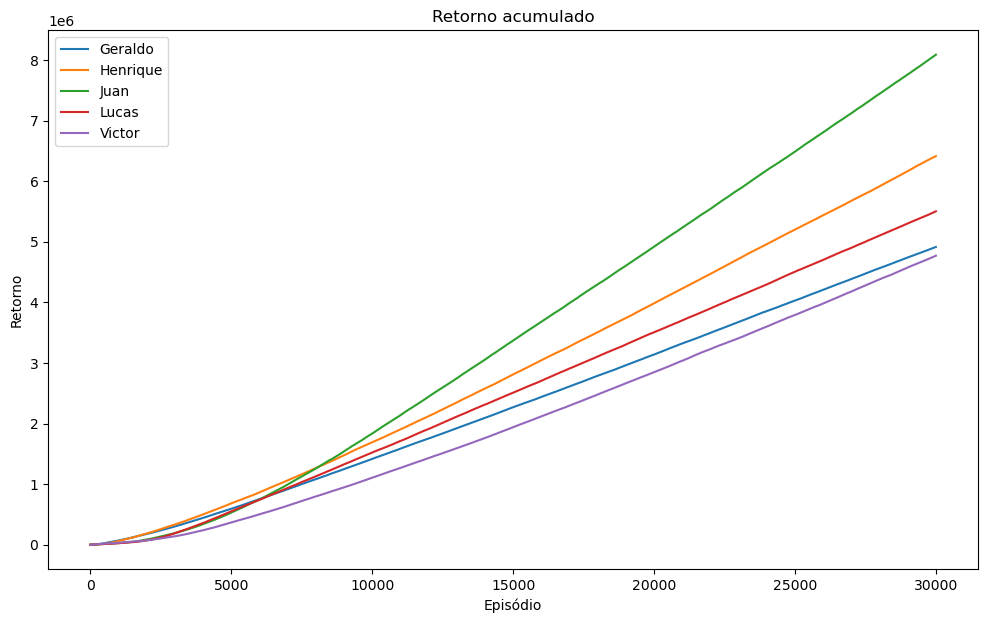

In [38]:
plot_multiple_results(results, cumulative='sum')